In [161]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
class Node:
    
    def __init__(self,state,gCost,fCost,tile_value,direction,parent):
        #create object of the node
        self.state = state
        self.gCost = gCost
        self.fCost = fCost
        self.direction = direction
        self.tile_value = tile_value
        self.parent = parent
    
    def expand_node(self):
        
        dash= self.find_positions_of_dash()
        x1,y1,x2,y2 = dash[0][0],dash[0][1],dash[1][0],dash[1][1]
        plist1 = [[x1,y1-1],[x1,y1+1],[x1-1,y1],[x1+1,y1]]
        plist2 = [[x2,y2-1],[x2,y2+1],[x2-1,y2],[x2+1,y2]]
        expanded_states=[]
        moves = []
        for i in range(4):
            successor1 = self.swap_tile_dash(x1,y1,x2,y2,plist1[i][0],plist1[i][1])
            successor2 = self.swap_tile_dash(x2,y2,x1,y1,plist2[i][0],plist2[i][1])
            if(successor1 is not None):
#                 moves.append(successor1[1:])
                next_node = Node(successor1[0],0,0,successor1[1],successor1[2],self)
                expanded_states.append(next_node)
            if(successor2 is not None):
#                 moves.append(successor2[1:])
                next_node = Node(successor2[0],0,0,successor2[1],successor2[2],self)
                expanded_states.append(next_node)
        return expanded_states
    
    def find_positions_of_dash(self):
        dash_positions = []
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                if(self.state[i][j] == '-'):
                    dash_positions.append([i,j])
        return dash_positions
    
    def swap_tile_dash(self,dash_i,dash_j,dash_x,dash_y,x,y):
        if(x>=0 and x<len(self.state) and y>=0 and y<len(self.state) and not (dash_x==x and dash_y==y) ):
            current_state = self.copy_list(self.state)
            value = current_state[x][y]
            current_state[x][y] = current_state[dash_i][dash_j]
            current_state[dash_i][dash_j] = value
            return [current_state,value,self.find_direction(dash_i,dash_j,x,y)]
        else:
            return None
        
    def find_direction(self,dash_i,dash_j,x,y):
        direction = ""
        if(dash_i==x):
            if(dash_j>y):
                direction="Right"
            else:
                direction = "Left"
        else:
            if(dash_i>x):
                direction="Down"
            else:
                direction="Up"
        return direction
    
    def copy_list(self,list_input):
        out = []
        for i in list_input:
            t = []
            for j in i:
                t.append(j)
            out.append(t)
        return out  
            
            
            
class N_Puzzle:
    def __init__(self,heuristic):
        self.size_n = 0
        self.OPEN = []
        self.CLOSED = []
        self.heuristic = heuristic
    
    def calculate_f(self,start,goal):
        return self.calculate_h(start.state,goal)+start.gCost
    
    def calculate_h(self,start,goal):
        if(self.heuristic == "Misplaced"):
            total_misplaced = 0
            for i in range(0,self.size_n):
                for j in range(0,self.size_n):
                    if start[i][j] != goal[i][j] and start[i][j] != '-':
                        total_misplaced += 1
            return total_misplaced
        elif(self.heuristic == "Manhatton"):
            total_distance = 0
            start_conf=[i for row in start for i in row ]
            goal_conf=[i for row in goal for i in row ]
            n = self.size_n
            for t in range(len(start_conf)):
                if(start_conf[t]!='-'):
                    g_index = goal_conf.index(start_conf[t])
                    total_distance += abs(g_index//n - t//n) + abs(g_index%n - t%n)  
            return total_distance
        
    def get_move_sequence(self,goal_node):
        moves=[]
        while(goal_node.parent!=None):
            moves.append([goal_node.tile_value,goal_node.direction])
            goal_node = goal_node.parent
        moves.reverse()
        move_seq=", ".join(["("+",".join(move)+")" for move in moves])
        return [move_seq,len(moves)]
    
    def A_star_algorithm(self,start,goal):
        
        start_list= start
        goal_list = goal
        
        self.size_n = len(start_list)
        
        if(len(start_list)==0 or start_list==None):
            return False
        
        start_node = Node(start_list,0,0, None,None,None)
        start_node.fCost = self.calculate_f(start_node,goal_list)
        self.OPEN.append(start_node)
        
        if(start_node.state == goal_list):
            return [start_node.fCost,0]
        
        output = None;
        number_of_counts = 0
        while(True):
            if(len(self.OPEN)==0):
                output="False"
                break
            current_state = self.OPEN[0]
            number_of_counts +=1
            
            if(self.calculate_h(current_state.state,goal_list) == 0):
                output = [self.get_move_sequence(current_state),number_of_counts]
                break
                
            childs_moves = current_state.expand_node()
            for child in childs_moves:
                nodes = []
                nodes.extend(self.OPEN)
                nodes.extend(self.CLOSED)
                node_state_list = [node.state for node in nodes]
                closed_node = [node.state for node in self.CLOSED]
                if(child.state not in node_state_list):
                    child.gCost = current_state.gCost + 1
                    child.fCost = self.calculate_f(child,goal_list)
                    self.OPEN.append(child)
                else:
                    child.gCost = min(child.gCost,current_state.gCost + 1)
                    prev_fCost = child.fCost
                    child.fCost = self.calculate_f(child,goal_list)
                    if(prev_fCost> child.fCost and (child.state in closed_node)):
                        self.OPEN.append(child)
                        del self.CLOSED[closed_node.index(child.state)]
                        
            del self.OPEN[0]
            self.CLOSED.append(current_state)
            self.OPEN.sort(key = lambda x:x.fCost,reverse=False)
            
        return output


if __name__=="__main__":
    startFilepath = input('Enter start file relative path : ') # Start.txt
    goalFilepath = input('Enter goal file relative path : ')
    startFile = open(startFilepath,"r")
    goalFile = open(goalFilepath,"r")
    start_list= [list(row.strip('\n').split('\t')) for row in startFile]
    goal_list = [list(row.strip('\n').split('\t')) for row in goalFile]

    startFile.close()
    goalFile.close()

    puzzle_test_Manhatton = N_Puzzle("Manhatton")
    move_sequence_manhatton = puzzle_test_Manhatton.A_star_algorithm(start_list,goal_list)
    output_conf_file=open("Output_sequence_manhatton.txt","w")
    output_conf_file.write(move_sequence_manhatton[0][0])
    output_conf_file.close() 
    
    puzzle_test_Misplaced = N_Puzzle("Misplaced")
    move_sequence_Misplaced = puzzle_test_Misplaced.A_star_algorithm(start_list,goal_list)
    output_conf_file=open("Output_sequence_misplaced.txt","w")
    output_conf_file.write(move_sequence_Misplaced[0][0])
    output_conf_file.close() 

Enter start file relative path : Start.txt
Enter goal file relative path : Goal.txt


In [142]:
test_cases=[]
manhattan_moves = []
misplaced_moves = []

def get_test_cases(TEST_CASE_FILE_NAME):
    test_case_file=open(TEST_CASE_FILE_NAME,'r')
    line = test_case_file.readline()
    while line!='':
        if( ',' in line):
            start=[]
            goal=[]
            size=list(map(int,line.split(",")))[0]
            for i in range(0,size):
                line = test_case_file.readline()
                start.append(line.split())
            for i in range(0,size):
                line = test_case_file.readline()
                goal.append(line.split())
            test_cases.append([start,goal])
        line = test_case_file.readline()
        
#     print(test_cases)

def calculate_num_moves():
    for i in range(0,len(test_cases)):
        puzzle_test_Manhatton = N_Puzzle("Manhatton")
        man_output= puzzle_test_Manhatton.A_star_algorithm(test_cases[i][0],test_cases[i][1])
        manhattan_moves.append(man_output[1])
        print("man",man_output[1])
        puzzle_test_Misplaced = N_Puzzle("Misplaced")
        miss_output = puzzle_test_Misplaced.A_star_algorithm(test_cases[i][0],test_cases[i][1])
        misplaced_moves.append(miss_output[1])
        print("miss",miss_output[1])
    print(manhattan_moves)
    print(misplaced_moves)
    


In [143]:
get_test_cases("test_case.txt")
calculate_num_moves()

man 12
miss 12
man 10
miss 10
man 9
miss 9
man 36
miss 71
man 8
miss 8
man 6
miss 6
man 6
miss 6
man 21
miss 21
man 10
miss 10
man 77
miss 99
man 8
miss 8
man 10
miss 12
man 6
miss 6
man 30
miss 30
man 25
miss 25
man 6
miss 6
man 3
miss 3
man 12
miss 12
man 21
miss 33
man 3
miss 3
man 36
miss 36
man 12
miss 12
man 6
miss 6
man 3
miss 3
man 6
miss 6
man 40
miss 40
man 12
miss 12
man 5
miss 5
man 16
miss 16
man 4
miss 4
man 16
miss 16
man 16
miss 18
man 6
miss 6
man 8
miss 8
man 4
miss 4
man 12
miss 12
man 9
miss 9
man 16
miss 16
man 12
miss 12
man 446
miss 1237
man 25
miss 25
man 73
miss 217
man 8
miss 8
man 8
miss 8
man 12
miss 12
man 12
miss 28
man 35
miss 35
man 18
miss 37
man 9
miss 9
man 20
miss 82
man 20
miss 20
man 20
miss 20
man 30
miss 30
man 14
miss 14
man 12
miss 12
man 9
miss 9
man 28
miss 44
man 24
miss 24
man 21
miss 24
man 9
miss 9
man 20
miss 20
man 12
miss 12
man 6
miss 6
man 134
miss 664
man 6
miss 6
man 18
miss 18
man 6
miss 6
man 42
miss 42
man 75
miss 363
man 16
mis

In [172]:
differences=[]
for i in range(len(manhattan_moves)):
    differences.append(misplaced_moves[i]-manhattan_moves[i])
print(sum(differences)/len(differences))

20.74


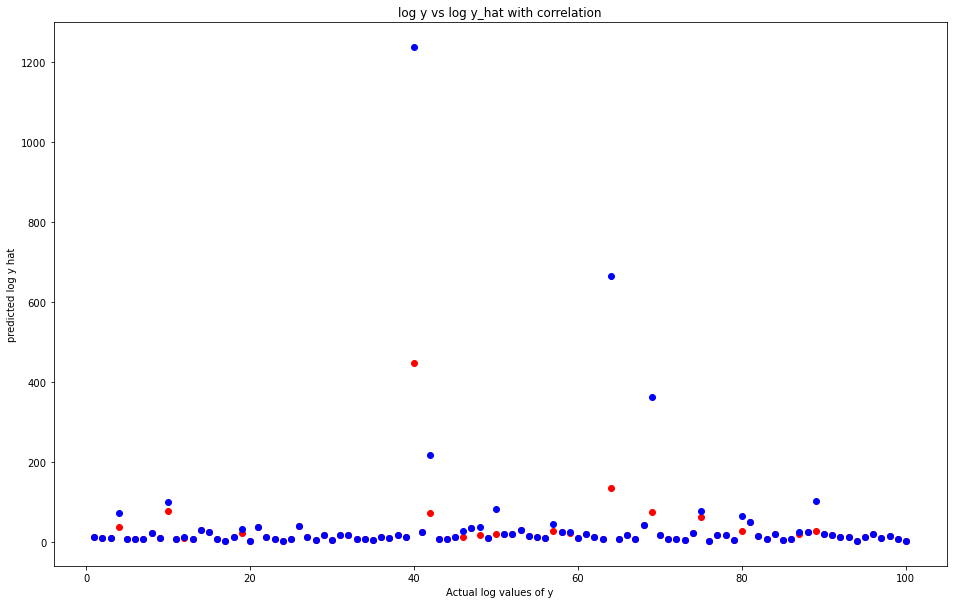

In [167]:
numbers = list(range(1,101))

plt.figure(figsize=(16,10))
plt.scatter(x=numbers,y=manhattan_moves,c='red',alpha=1)
plt.xlabel('Actual log values of y')
plt.ylabel('predicted log y hat')
plt.title(f'log y vs log y_hat with correlation')

plt.scatter(x=numbers,y=misplaced_moves,c='blue',alpha=1)

plt.show()

In [168]:
numbers = list(range(100))
print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


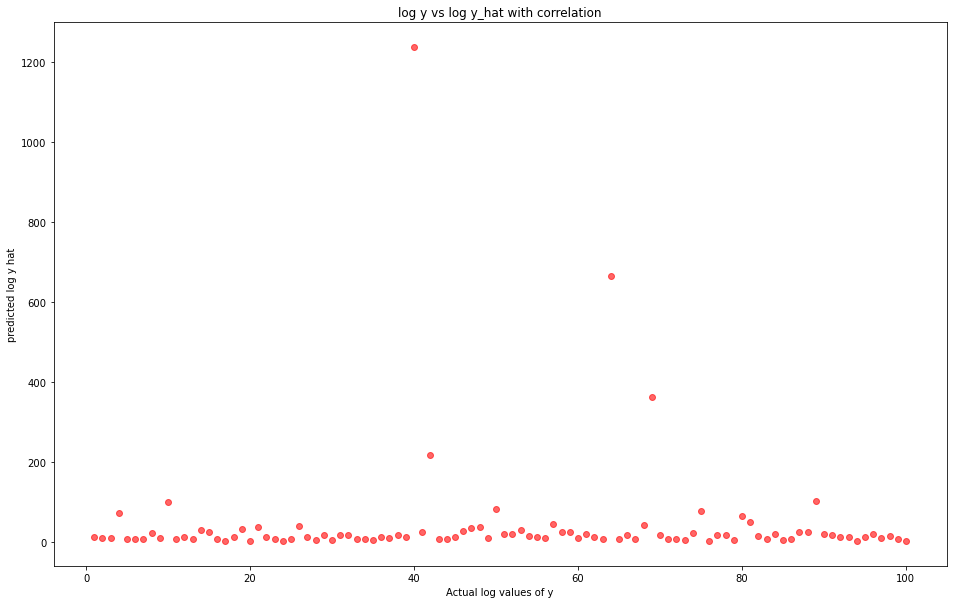

In [169]:
numbers = list(range(1,101))

plt.figure(figsize=(16,10))
plt.scatter(x=numbers,y=misplaced_moves,c='red',alpha=0.6)
plt.xlabel('Actual log values of y')
plt.ylabel('predicted log y hat')
plt.title(f'log y vs log y_hat with correlation')

plt.show()

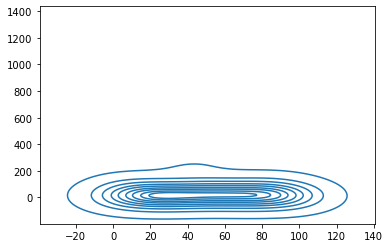

In [170]:
sns.kdeplot(x=numbers,y=np.array(misplaced_moves))
plt.show()

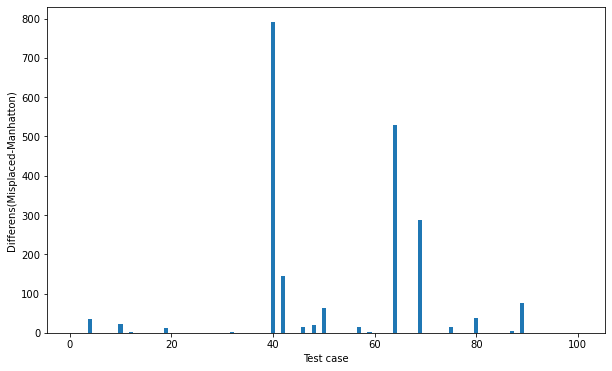

In [184]:
plt.figure(figsize=(10,6))
plt.bar(numbers,differences)
plt.xlabel('Test case')
plt.ylabel('Differens(Misplaced-Manhatton)')
plt.show()

In [176]:
print(manhattan_moves)

[12, 10, 9, 36, 8, 6, 6, 21, 10, 77, 8, 10, 6, 30, 25, 6, 3, 12, 21, 3, 36, 12, 6, 3, 6, 40, 12, 5, 16, 4, 16, 16, 6, 8, 4, 12, 9, 16, 12, 446, 25, 73, 8, 8, 12, 12, 35, 18, 9, 20, 20, 20, 30, 14, 12, 9, 28, 24, 21, 9, 20, 12, 6, 134, 6, 18, 6, 42, 75, 16, 8, 8, 4, 21, 62, 2, 16, 16, 5, 27, 49, 14, 6, 20, 4, 6, 20, 24, 27, 20, 18, 12, 12, 2, 12, 20, 10, 14, 8, 3]


In [177]:
print(misplaced_moves)

[12, 10, 9, 71, 8, 6, 6, 21, 10, 99, 8, 12, 6, 30, 25, 6, 3, 12, 33, 3, 36, 12, 6, 3, 6, 40, 12, 5, 16, 4, 16, 18, 6, 8, 4, 12, 9, 16, 12, 1237, 25, 217, 8, 8, 12, 28, 35, 37, 9, 82, 20, 20, 30, 14, 12, 9, 44, 24, 24, 9, 20, 12, 6, 664, 6, 18, 6, 42, 363, 16, 8, 8, 4, 21, 77, 2, 16, 16, 5, 64, 49, 14, 6, 20, 4, 6, 24, 24, 103, 20, 18, 12, 12, 2, 12, 20, 10, 14, 8, 3]


In [182]:
import scipy.stats as stats
test_statistics_value, p_value = stats.ttest_rel(manhattan_moves, misplaced_moves)
print(test_statistics_value)
print(p_value)

-2.083259263554605
0.039804181779757926


In [183]:
import pandas as pd
dict = {'misplaced': misplaced_moves, 'manhatton': manhattan_moves}
df = pd.DataFrame(dict) 
df.to_csv('move.csv') 